## Handling the Outliers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ie
ie.filterwarnings("ignore")

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [6]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

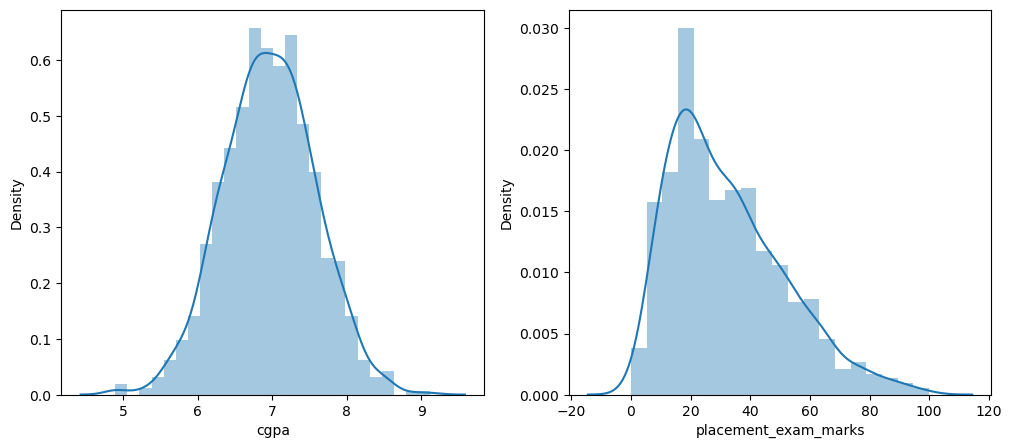

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

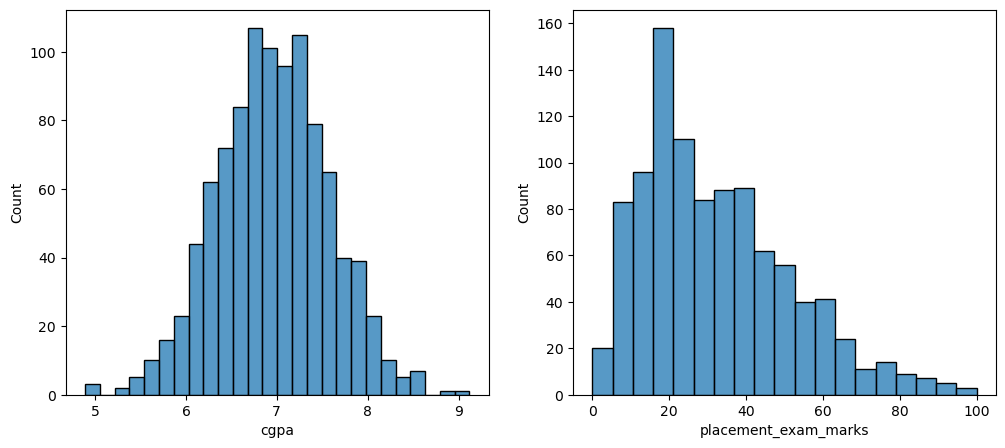

In [8]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'])

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'])

plt.show()

<AxesSubplot: >

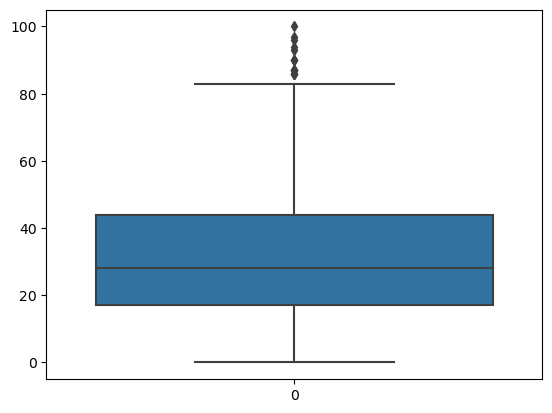

In [10]:
sns.boxplot(df['placement_exam_marks'])

## Remove the outliers


In [13]:
## Finding the IQR

percentile25=df['placement_exam_marks'].quantile(0.25) ## Q1
percentile75=df['placement_exam_marks'].quantile(0.75) ## Q3

In [14]:
percentile25,percentile75

(17.0, 44.0)

In [15]:
IQR=percentile75-percentile25

In [17]:
IQR

27.0

In [18]:
upperlimit=percentile75+1.5*IQR
lowerlimit=percentile25-1.5*IQR

In [65]:
## outliers range
upperlimit,lowerlimit

(84.5, -23.5)

In [66]:
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [67]:
df[df['placement_exam_marks']>upperlimit].shape

(15, 3)

In [68]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


In [69]:
## To delect the outliers
new_df=df[df['placement_exam_marks']<upperlimit]

In [70]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [71]:
df.shape

(1000, 3)

In [72]:
new_df.shape

(985, 3)

<AxesSubplot: >

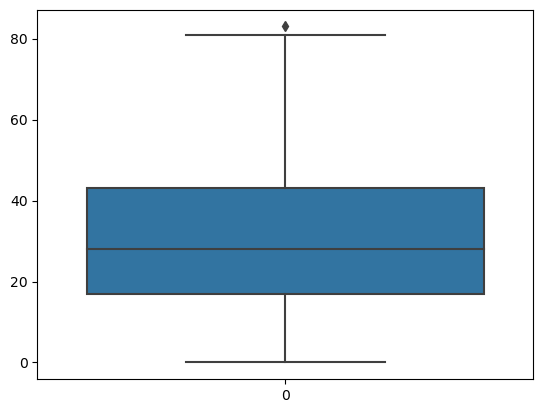

In [73]:
sns.boxplot(new_df['placement_exam_marks'])

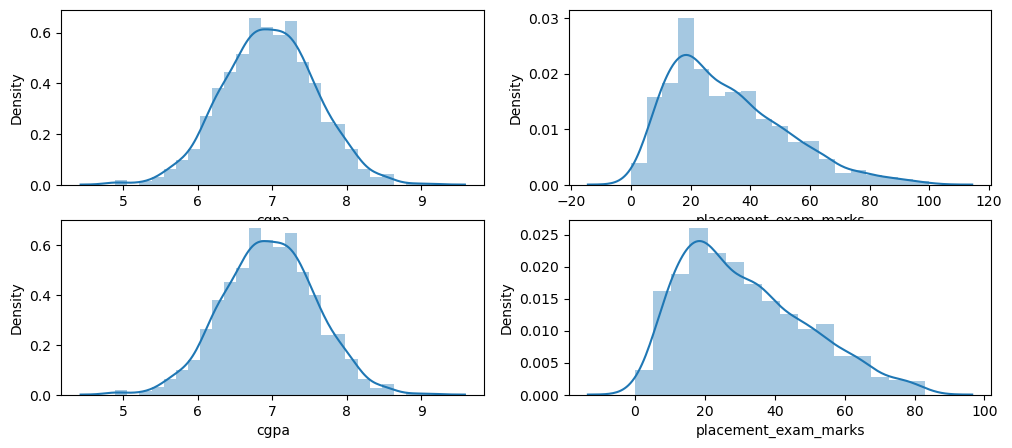

In [74]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.distplot(df['placement_exam_marks'])


plt.subplot(2,2,3)
sns.distplot(new_df['cgpa'])

plt.subplot(2,2,4)
sns.distplot(new_df['placement_exam_marks'])


plt.show()